  Patient  Gender   AHI      Weight   Age      Height   Cervical        BMI
0   P0001       1  71.0   82.000000  39.0  168.000000  40.617735  29.053288
1   P0002       1  29.6  119.000000  56.0  174.000000  48.000000  39.305060
2   P0003       1  56.0   87.797037  46.0  171.399408  43.000000  29.885548
3   P0004       1  19.7   78.000000  39.0  168.000000  42.000000  27.636054
4   P0005       1   9.0   80.000000  32.0  173.000000  40.000000  26.729927
           Gender         AHI      Weight         Age      Height    Cervical  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     0.713405   20.364653   87.684107   49.429150  171.315251   40.636455   
std      0.452519   18.692784   18.231258   12.392236    9.496843    3.922433   
min      0.000000    0.000000   45.000000   19.000000  144.000000   30.000000   
25%      0.000000    6.300000   75.000000   40.000000  165.000000   38.000000   
50%      1.000000   14.200000   86.000000   49.000000  171

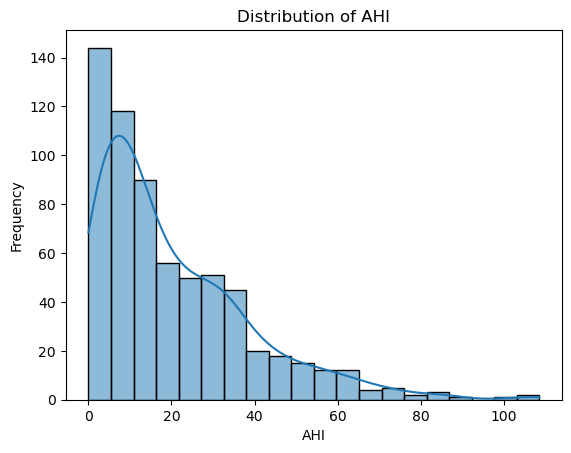

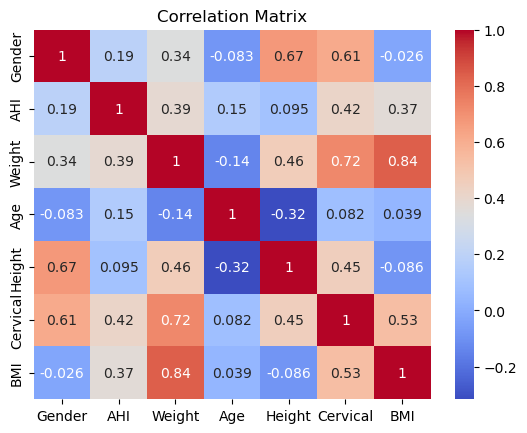

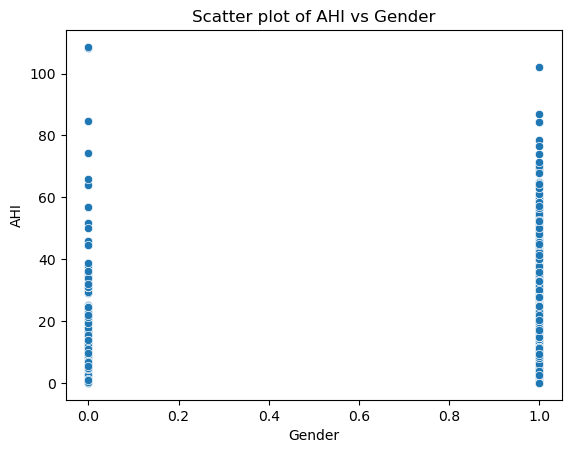

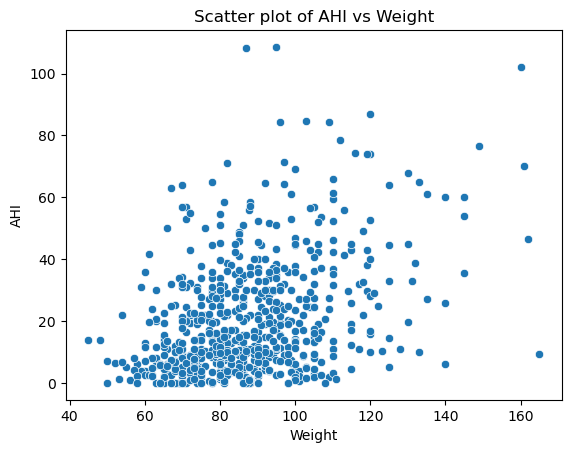

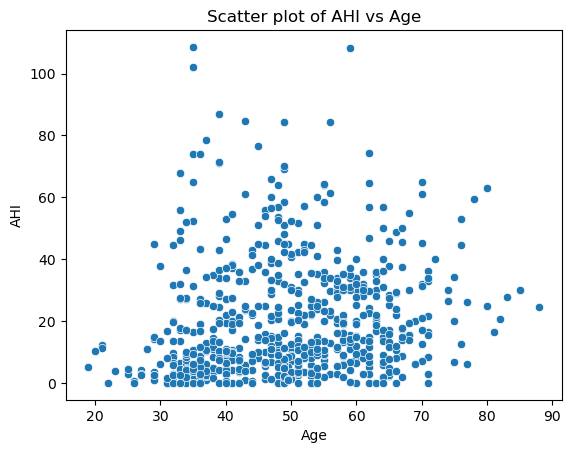

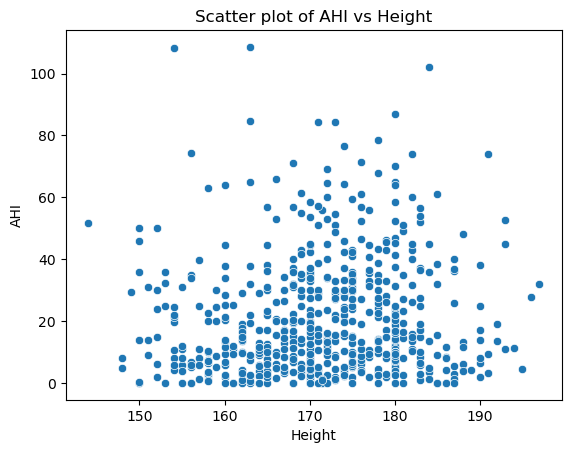

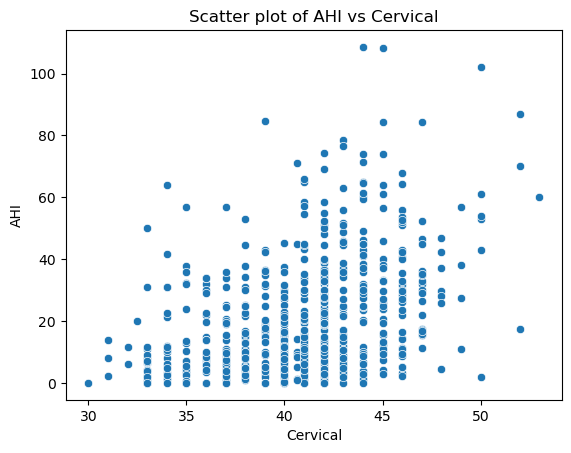

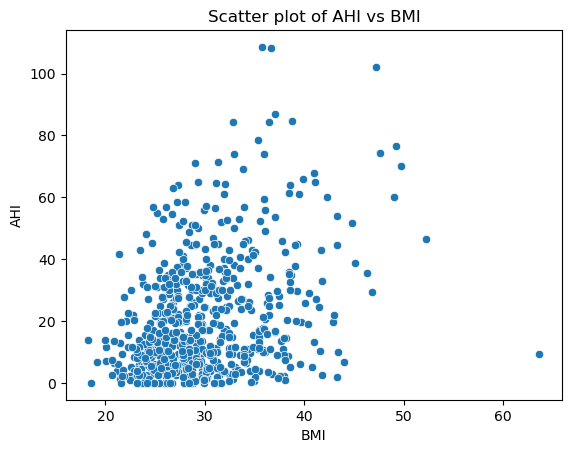

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'DATA/OSA_DB_cleaned.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Display basic statistics of the dataframe
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plot the distribution of the AHI column
sns.histplot(df['AHI'], kde=True)
plt.title('Distribution of AHI')
plt.xlabel('AHI')
plt.ylabel('Frequency')
plt.show()

# Drop the 'Patient' column
df = df.drop(columns=['Patient'])

# Plot the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of AHI against other numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    if feature != 'AHI':
        sns.scatterplot(x=df[feature], y=df['AHI'])
        plt.title(f'Scatter plot of AHI vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('AHI')
        plt.show()

In [2]:
# Display basic statistics of the dataframe
df.describe()

df.drop(columns=['Gender']).describe()

,AHI,Weight,Age,Height,Cervical,BMI
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,20.364653,87.684107,49.429150,171.315251,40.636455,29.836298
std,18.692784,18.231258,12.392236,9.496843,3.922433,5.580083
min,0.000000,45.000000,19.000000,144.000000,30.000000,18.289895
25%,6.300000,75.000000,40.000000,165.000000,38.000000,26.038781
50%,14.200000,86.000000,49.000000,171.000000,41.000000,28.734672
75%,30.000000,97.000000,59.000000,178.000000,43.000000,32.653061
max,108.600000,165.000000,88.000000,197.000000,53.000000,63.654952


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    649 non-null    int64  
 1   AHI       649 non-null    float64
 2   Weight    649 non-null    float64
 3   Age       649 non-null    float64
 4   Height    649 non-null    float64
 5   Cervical  649 non-null    float64
 6   BMI       649 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 35.6 KB


In [4]:
df.head()

,Gender,AHI,Weight,Age,Height,Cervical,BMI
0,1,71.0,82.000000,39.0,168.000000,40.617735,29.053288
1,1,29.6,119.000000,56.0,174.000000,48.000000,39.305060
2,1,56.0,87.797037,46.0,171.399408,43.000000,29.885548
3,1,19.7,78.000000,39.0,168.000000,42.000000,27.636054
4,1,9.0,80.000000,32.0,173.000000,40.000000,26.729927


## Data cleaning


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Gender      0
AHI         0
Weight      0
Age         0
Height      0
Cervical    0
BMI         0
dtype: int64


In [6]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display duplicate rows if any
if duplicates.sum() > 0:
    print(df[duplicates])


Number of duplicate rows: 1
     Gender  AHI  Weight   Age  Height  Cervical        BMI
200       1  4.8    86.0  38.0   166.0      40.0  31.209174


## Data distributions 

In [7]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk normality test on each column except 'Gender'
shapiro_results = {}
for column in df.columns:
    if column != 'Gender':
        stat, p_value = shapiro(df[column])
        shapiro_results[column] = {'stat': stat, 'p_value': p_value}

# Display the results
for column, result in shapiro_results.items():
    print(f"Column: {column}")
    print(f"Shapiro-Wilk Test Statistic: {result['stat']:.4f}, p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("The data does not follow a normal distribution\n")
    else:
        print("The data follows a normal distribution\n")

# Plot histograms for each numerical column except 'Gender'
num_columns = 3
num_rows = (len(df_copy.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df_copy.columns):
    sns.histplot(df_copy[column], ax=axes[i], kde=False)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create a dataframe to display the Shapiro-Wilk test results
shapiro_df = pd.DataFrame(shapiro_results).T
shapiro_df.columns = ['Shapiro-Wilk Test Statistic', 'p-value']





Column: AHI
Shapiro-Wilk Test Statistic: 0.8682, p-value: 0.0000
The data does not follow a normal distribution

Column: Weight
Shapiro-Wilk Test Statistic: 0.9602, p-value: 0.0000
The data does not follow a normal distribution

Column: Age
Shapiro-Wilk Test Statistic: 0.9894, p-value: 0.0001
The data does not follow a normal distribution

Column: Height
Shapiro-Wilk Test Statistic: 0.9940, p-value: 0.0115
The data does not follow a normal distribution

Column: Cervical
Shapiro-Wilk Test Statistic: 0.9907, p-value: 0.0004
The data does not follow a normal distribution

Column: BMI
Shapiro-Wilk Test Statistic: 0.9375, p-value: 0.0000
The data does not follow a normal distribution



NameError: name 'df_copy' is not defined

In [ ]:
# Display the dataframe
shapiro_df

,Shapiro-Wilk Test Statistic,p-value
AHI,0.868174,5.961205e-23
Weight,0.960157,2.898299e-12
Age,0.989378,1.214237e-04
Height,0.994018,1.150263e-02
Cervical,0.990708,4.123010e-04
BMI,0.937534,7.432944e-16


In [ ]:
from scipy.stats import kstest, norm, expon, uniform, chi2, gamma
import numpy as np

df_no_gender = df.drop(columns=['Gender'])
print(df_no_gender.head())

# Define the distributions to test
distributions = ['norm', 'expon', 'uniform', 'chi2', 'gamma']

# Perform Kolmogorov-Smirnov test for each column to check if it follows a specific distribution
ks_results = {}

for column in df_no_gender.columns:
    ks_results[column] = {}
    for dist in distributions:
        if dist == 'norm':
            params = norm.fit(df_no_gender[column])
            stat, p_value = kstest(df_no_gender[column], dist, args=params)
        elif dist == 'expon':
            params = expon.fit(df_no_gender[column])
            stat, p_value = kstest(df_no_gender[column], dist, args=params)
        elif dist == 'uniform':
            params = uniform.fit(df_no_gender[column])
            stat, p_value = kstest(df_no_gender[column], dist, args=params)
        elif dist == 'chi2':
            params = chi2.fit(df_no_gender[column])
            stat, p_value = kstest(df_no_gender[column], dist, args=params)
        elif dist == 'gamma':
            params = gamma.fit(df_no_gender[column])
            stat, p_value = kstest(df_no_gender[column], dist, args=params)
        ks_results[column][dist] = {'stat': stat, 'p_value': p_value}

# Display the KS test results
for column, result in ks_results.items():
    print(f"Column: {column}")
    for dist, values in result.items():
        print(f"Distribution: {dist}")
        print(f"KS Test Statistic: {values['stat']:.4f}, p-value: {values['p_value']:.4f}")
        if values['p_value'] < 0.05:
            print("The data does not follow this distribution\n")
        else:
            print("The data follows this distribution\n")

# Create an overview of which column follows which distribution with corresponding p-value
distribution_overview = {}

for column, result in ks_results.items():
    distribution_overview[column] = []
    for dist, values in result.items():
        if values['p_value'] >= 0.05:
            distribution_overview[column].append((dist, values['p_value']))

# Display the overview
for column, dist_list in distribution_overview.items():
    print(f"Column: {column}")
    for dist, p_value in dist_list:
        print(f"Follows {dist} distribution with p-value: {p_value:.4f}")
    if not dist_list:
        print("Does not follow any tested distribution")
    print()

    AHI      Weight   Age      Height   Cervical        BMI
0  71.0   82.000000  39.0  168.000000  40.617735  29.053288
1  29.6  119.000000  56.0  174.000000  48.000000  39.305060
2  56.0   87.797037  46.0  171.399408  43.000000  29.885548
3  19.7   78.000000  39.0  168.000000  42.000000  27.636054
4   9.0   80.000000  32.0  173.000000  40.000000  26.729927
Column: AHI
Distribution: norm
KS Test Statistic: 0.1378, p-value: 0.0000
The data does not follow this distribution

Distribution: expon
KS Test Statistic: 0.0493, p-value: 0.0824
The data follows this distribution

Distribution: uniform
KS Test Statistic: 0.5037, p-value: 0.0000
The data does not follow this distribution

Distribution: chi2
KS Test Statistic: 0.1594, p-value: 0.0000
The data does not follow this distribution

Distribution: gamma
KS Test Statistic: 0.1233, p-value: 0.0000
The data does not follow this distribution

Column: Weight
Distribution: norm
KS Test Statistic: 0.0719, p-value: 0.0023
The data does not follow

## EDA for classification 


Gender
Male      463
Female    186
Name: count, dtype: int64


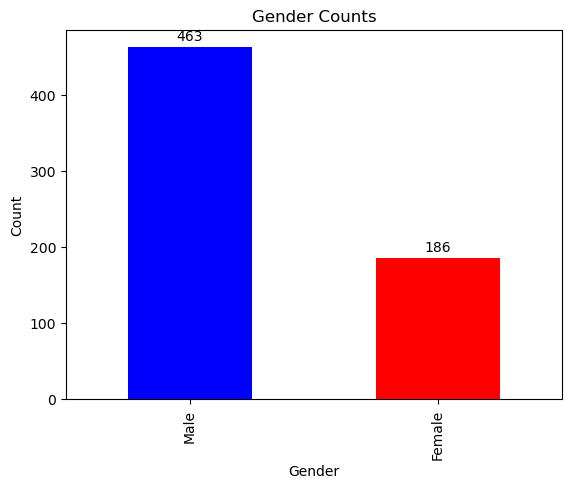

In [ ]:
# Check the unique values of the column 'Gender' and print the counts
gender_counts = df['Gender'].value_counts()
gender_counts.index = gender_counts.index.map({1: 'Male', 0: 'Female'})
print(gender_counts)

# Plot the gender counts
gender_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate the bars with the absolute values
for i, count in enumerate(gender_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()

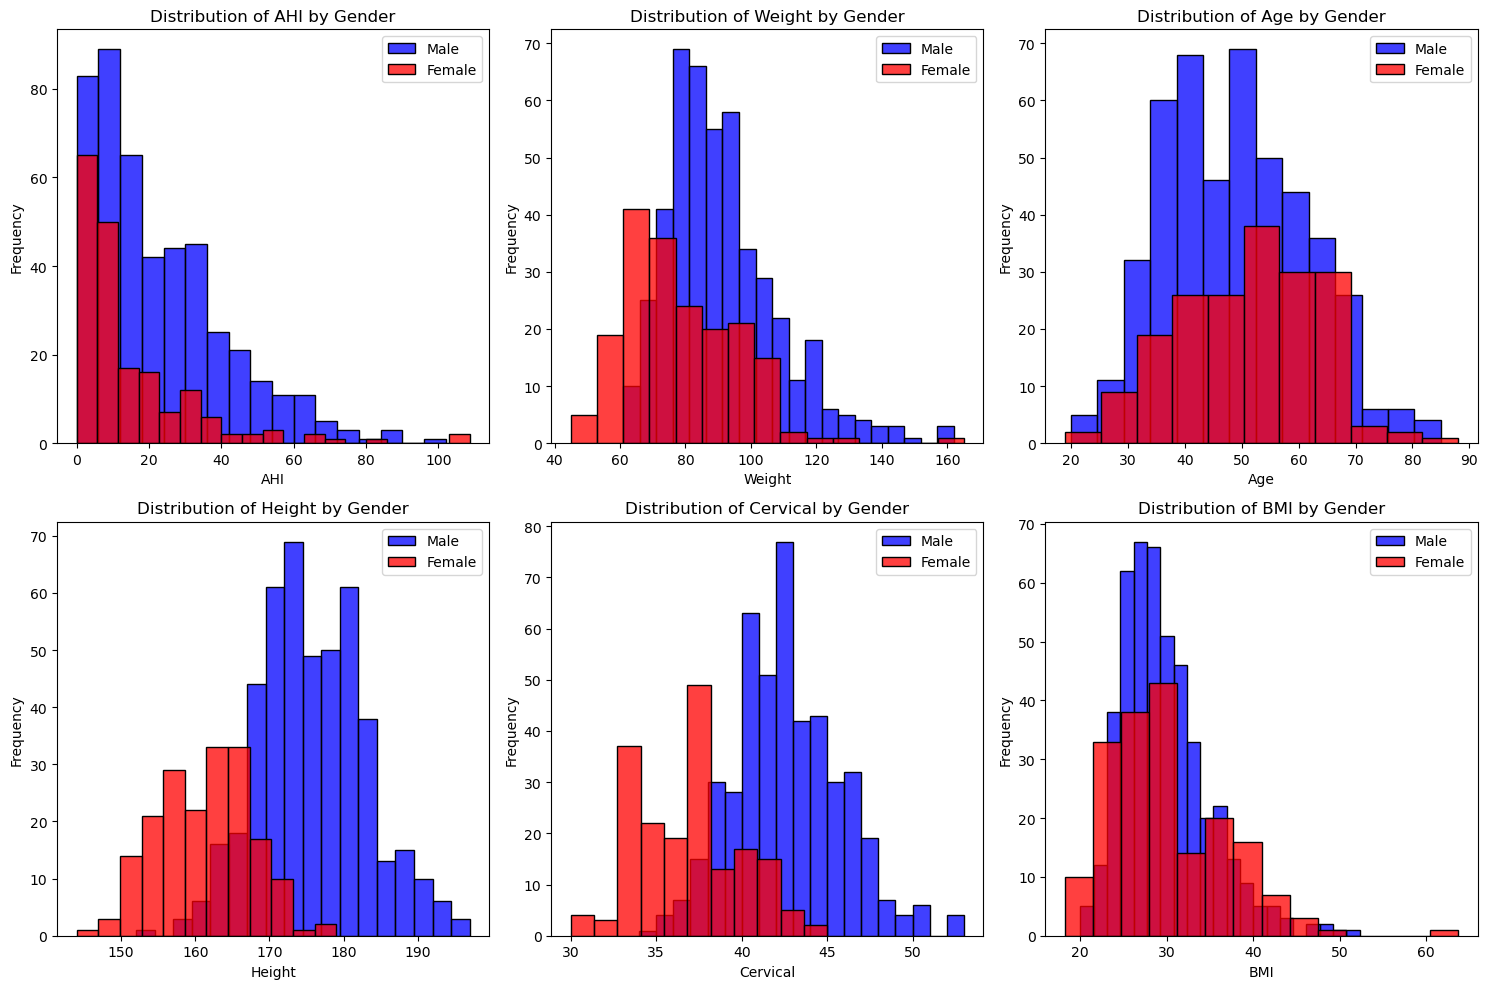

In [ ]:
# Separate the dataframe by gender
df_male = df[df['Gender'] == 1]
df_female = df[df['Gender'] == 0]

# Drop the 'Gender' column in both dataframes
df_male = df_male.drop(columns=['Gender'])
df_female = df_female.drop(columns=['Gender'])

# Plot histograms for each column in df_male and df_female
num_columns = 3
num_rows = (len(df_male.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df_male.columns):
    sns.histplot(df_male[column], color='blue', label='Male', ax=axes[i])
    sns.histplot(df_female[column], color='red', label='Female', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Gender')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()


plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_20232\1860105566.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column, data=df, palette=['blue', 'red'])
C:\Users\pc\AppData\Local\Temp\ipykernel_20232\1860105566.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column, data=df, palette=['blue', 'red'])
C:\Users\pc\AppData\Local\Temp\ipykernel_20232\1860105566.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column, data=df, palette=['blue', 'red'])
C:\Users\pc\AppData\Local\Temp\ipykernel_20232

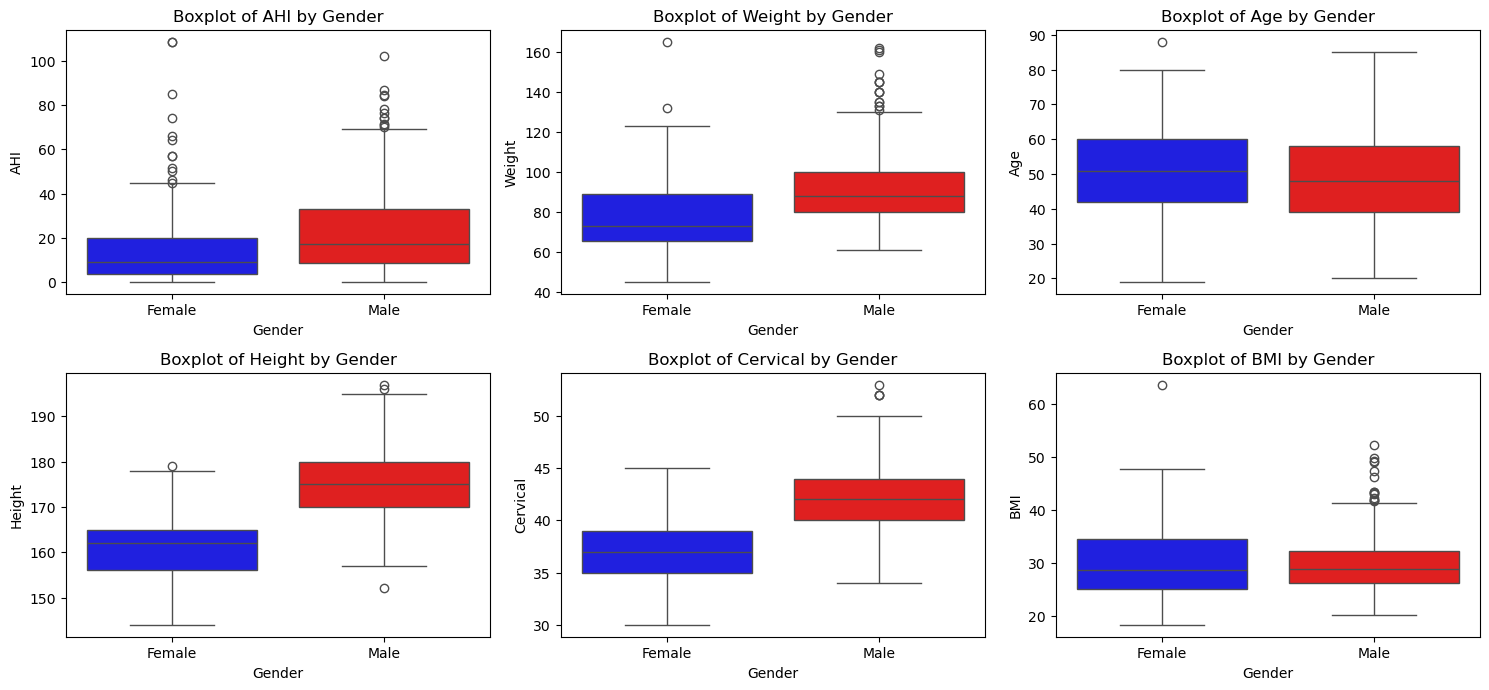

In [ ]:
# Create a new figure
plt.figure(figsize=(15, 10))

df_copy = df.copy()

# drop gender column in df_copy
df_copy = df_copy.drop(columns="Gender")

# Create boxplots for each numerical column by gender
for i, column in enumerate(numerical_features):
    if column != 'Gender':
        plt.subplot(3, 3, i )
        sns.boxplot(x='Gender', y=column, data=df, palette=['blue', 'red'])
        plt.xticks([0, 1], ['Female', 'Male'])
        plt.title(f'Boxplot of {column} by Gender')
        plt.xlabel('Gender')
        plt.ylabel(column)

plt.tight_layout()
plt.show()


### Check if there are statistically significant differences between male and female 

In [ ]:
from scipy.stats import shapiro, levene

# Check normality assumption using Shapiro-Wilk test
normality_results = {}
for feature in numerical_features:
    if feature != 'Gender':
        stat_male, p_value_male = shapiro(df_male[feature])
        stat_female, p_value_female = shapiro(df_female[feature])
        normality_results[feature] = {
            'male': {'stat': stat_male, 'p_value': p_value_male},
            'female': {'stat': stat_female, 'p_value': p_value_female}
        }

# Check homogeneity of variances using Levene's test
homogeneity_results = {}
for feature in numerical_features:
    if feature != 'Gender':
        stat, p_value = levene(df_male[feature], df_female[feature])
        homogeneity_results[feature] = {'stat': stat, 'p_value': p_value}

# Display the results
print("Normality Test Results (Shapiro-Wilk):")
for feature, result in normality_results.items():
    print(f"Feature: {feature}")
    print(f"Male: stat={result['male']['stat']:.4f}, p-value={result['male']['p_value']:.4f}")
    print(f"Female: stat={result['female']['stat']:.4f}, p-value={result['female']['p_value']:.4f}")
    if result['male']['p_value'] < 0.05 or result['female']['p_value'] < 0.05:
        print("At least one group does not follow a normal distribution\n")
    else:
        print("Both groups follow a normal distribution\n")

print("Homogeneity of Variances Test Results (Levene's):")
for feature, result in homogeneity_results.items():
    print(f"Feature: {feature}")
    print(f"stat={result['stat']:.4f}, p-value={result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("Variances are not equal\n")
    else:
        print("Variances are equal\n")

Normality Test Results (Shapiro-Wilk):
Feature: AHI
Male: stat=0.9048, p-value=0.0000
Female: stat=0.7274, p-value=0.0000
At least one group does not follow a normal distribution

Feature: Weight
Male: stat=0.9330, p-value=0.0000
Female: stat=0.9343, p-value=0.0000
At least one group does not follow a normal distribution

Feature: Age
Male: stat=0.9832, p-value=0.0000
Female: stat=0.9867, p-value=0.0776
At least one group does not follow a normal distribution

Feature: Height
Male: stat=0.9919, p-value=0.0130
Female: stat=0.9900, p-value=0.2224
At least one group does not follow a normal distribution

Feature: Cervical
Male: stat=0.9822, p-value=0.0000
Female: stat=0.9767, p-value=0.0034
At least one group does not follow a normal distribution

Feature: BMI
Male: stat=0.9343, p-value=0.0000
Female: stat=0.9385, p-value=0.0000
At least one group does not follow a normal distribution

Homogeneity of Variances Test Results (Levene's):
Feature: AHI
stat=7.5084, p-value=0.0063
Variances are

In [ ]:
# Create a dataframe to display the Levene's test results
levene_df = pd.DataFrame(homogeneity_results).T
levene_df.columns = ['Levene Test Statistic', 'p-value']

# Display the dataframe
levene_df

,Levene Test Statistic,p-value
AHI,7.508407,0.006311
Weight,0.393216,0.530835
Age,0.769053,0.380836
Height,2.106412,0.147168
Cervical,0.146870,0.701671
BMI,17.176085,0.000039


In [ ]:
from scipy.stats import ttest_ind

# Perform t-tests for each numerical feature
results = {}
for feature in numerical_features:
    if feature != 'Gender':
        t_stat, p_value = ttest_ind(df_male[feature], df_female[feature], equal_var=False)
        results[feature] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"t-statistic: {result['t_stat']:.4f}, p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("Statistically significant difference between genders\n")
    else:
        print("No statistically significant difference between genders\n")

Feature: AHI
t-statistic: 4.9686, p-value: 0.0000
Statistically significant difference between genders

Feature: Weight
t-statistic: 9.0878, p-value: 0.0000
Statistically significant difference between genders

Feature: Age
t-statistic: -2.1415, p-value: 0.0329
Statistically significant difference between genders

Feature: Height
t-statistic: 24.5211, p-value: 0.0000
Statistically significant difference between genders

Feature: Cervical
t-statistic: 20.0961, p-value: 0.0000
Statistically significant difference between genders

Feature: BMI
t-statistic: -0.5935, p-value: 0.5534
No statistically significant difference between genders



In [ ]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U tests for each numerical feature
non_parametric_results = {}
for feature in numerical_features:
    if feature != 'Gender':
        stat, p_value = mannwhitneyu(df_male[feature], df_female[feature], alternative='two-sided')
        non_parametric_results[feature] = {'stat': stat, 'p_value': p_value}

# Display the results
for feature, result in non_parametric_results.items():
    print(f"Feature: {feature}")
    print(f"U-statistic: {result['stat']:.4f}, p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print("Statistically significant difference between genders\n")
    else:
        print("No statistically significant difference between genders\n")

Feature: AHI
U-statistic: 56823.0000, p-value: 0.0000
Statistically significant difference between genders

Feature: Weight
U-statistic: 62651.5000, p-value: 0.0000
Statistically significant difference between genders

Feature: Age
U-statistic: 37578.0000, p-value: 0.0111
Statistically significant difference between genders

Feature: Height
U-statistic: 80297.0000, p-value: 0.0000
Statistically significant difference between genders

Feature: Cervical
U-statistic: 76322.0000, p-value: 0.0000
Statistically significant difference between genders

Feature: BMI
U-statistic: 43521.5000, p-value: 0.8306
No statistically significant difference between genders



In [ ]:
# Create a dataframe to display the Mann-Whitney U test results
u_statistic_df = pd.DataFrame(non_parametric_results).T
u_statistic_df.columns = ['U-statistic', 'p-value']

# Display the dataframe
u_statistic_df

,U-statistic,p-value
AHI,56823.0,1.852412e-10
Weight,62651.5,1.150070e-19
Age,37578.0,1.113910e-02
Height,80297.0,9.976198e-67
Cervical,76322.0,7.504872e-54
BMI,43521.5,8.306177e-01


Number of patients with no OSA (AHI <= 5): 137
Number of patients with mild OSA (5 < AHI <= 15): 202
Number of patients with moderate OSA (15 < AHI <= 30): 153
Number of patients with severe OSA (AHI > 30): 157


C:\Users\pc\AppData\Local\Temp\ipykernel_20232\1974465496.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='viridis')


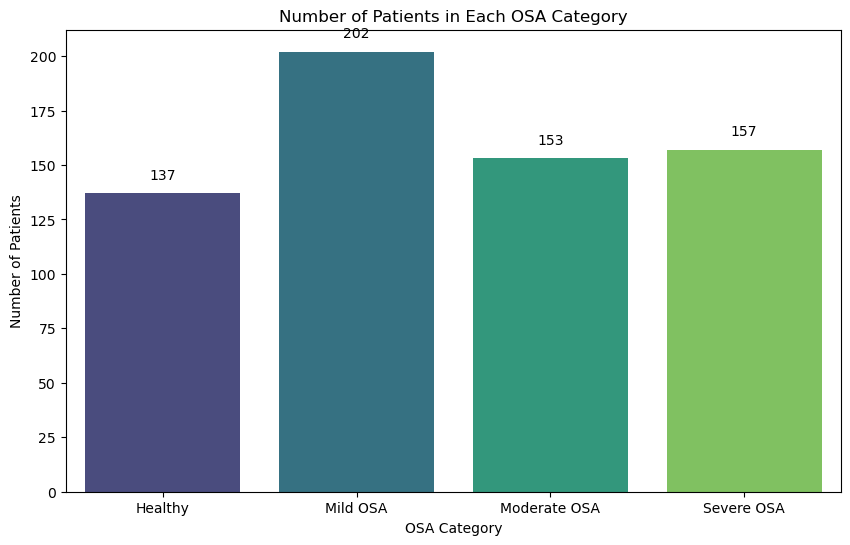

In [ ]:
# Define the conditions for each OSA category
severe_osa = df[df['AHI'] > 30]
moderate_osa = df[(df['AHI'] > 15) & (df['AHI'] <= 30)]
mild_osa = df[(df['AHI'] > 5) & (df['AHI'] <= 15)]
no_osa = df[df['AHI'] <= 5]

# Calculate the number of patients in each category
num_severe_osa = severe_osa.shape[0]
num_moderate_osa = moderate_osa.shape[0]
num_mild_osa = mild_osa.shape[0]
num_no_osa = no_osa.shape[0]
# Print the results
print(f"Number of patients with no OSA (AHI <= 5): {num_no_osa}")
print(f"Number of patients with mild OSA (5 < AHI <= 15): {num_mild_osa}")
print(f"Number of patients with moderate OSA (15 < AHI <= 30): {num_moderate_osa}")
print(f"Number of patients with severe OSA (AHI > 30): {num_severe_osa}")

# Plot the number of patients in each OSA category
categories = ['Healthy', 'Mild OSA', 'Moderate OSA', 'Severe OSA']
counts = [num_no_osa, num_mild_osa, num_moderate_osa, num_severe_osa]

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.title('Number of Patients in Each OSA Category')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')

# Annotate the bars with the absolute values
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.show()


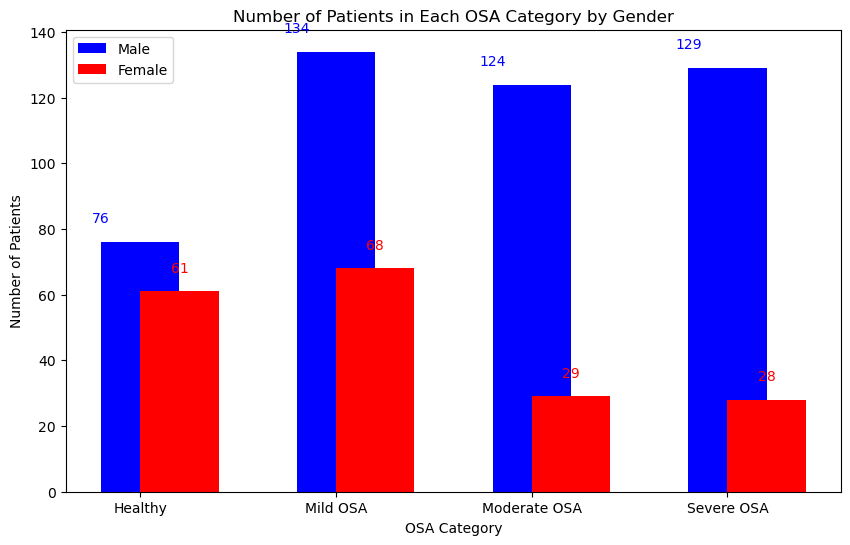

In [ ]:
# Plot the number of patients in each OSA category by gender
categories = ['Healthy', 'Mild OSA', 'Moderate OSA', 'Severe OSA']
counts_male = [no_osa[no_osa['Gender'] == 1].shape[0], mild_osa[mild_osa['Gender'] == 1].shape[0], moderate_osa[moderate_osa['Gender'] == 1].shape[0], severe_osa[severe_osa['Gender'] == 1].shape[0]]
counts_female = [no_osa[no_osa['Gender'] == 0].shape[0], mild_osa[mild_osa['Gender'] == 0].shape[0], moderate_osa[moderate_osa['Gender'] == 0].shape[0], severe_osa[severe_osa['Gender'] == 0].shape[0]]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, counts_male, width=0.4, label='Male', align='center', color='blue')
plt.bar(x, counts_female, width=0.4, label='Female', align='edge', color='red')
plt.title('Number of Patients in Each OSA Category by Gender')
plt.xlabel('OSA Category')
plt.ylabel('Number of Patients')
plt.xticks(x, categories)
plt.legend()

# Annotate the bars with the absolute values
for i, (count_male, count_female) in enumerate(zip(counts_male, counts_female)):
    plt.text(i - 0.2, count_male + 5, str(count_male), ha='center', va='bottom', color='blue')
    plt.text(i + 0.2, count_female + 5, str(count_female), ha='center', va='bottom', color='red')

plt.show()

## EDA for Regression 

In [34]:
df_reg = df.drop(columns=['Height', 'Weight', 'Gender'])
# df_reg = df.drop(columns=['Height', 'Weight'])
df_reg

,AHI,Age,Cervical,BMI
0,71.0,39.0,40.617735,29.053288
1,29.6,56.0,48.000000,39.305060
2,56.0,46.0,43.000000,29.885548
3,19.7,39.0,42.000000,27.636054
4,9.0,32.0,40.000000,26.729927
...,...,...,...,...
644,36.3,64.0,39.000000,30.119376
645,9.2,35.0,45.000000,32.407407
646,52.2,50.0,42.000000,27.777778
647,5.4,57.0,35.000000,24.538965


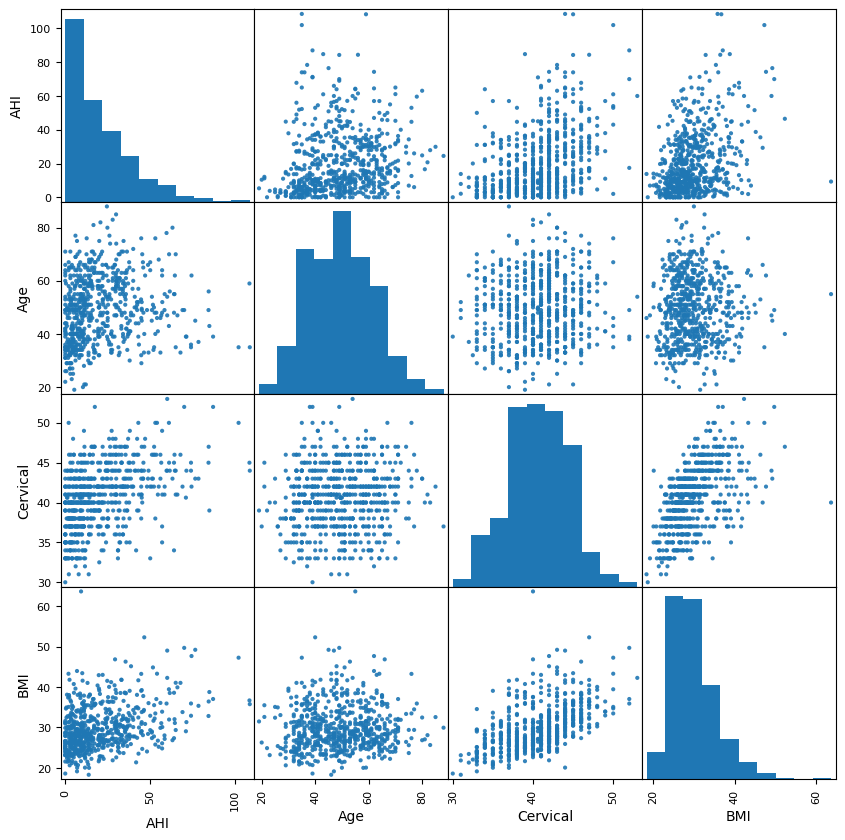

In [40]:
from pandas.plotting import scatter_matrix
import numpy as np

scatter_matrix(df_reg, alpha=0.9, figsize=(10, 10))
plt.show()


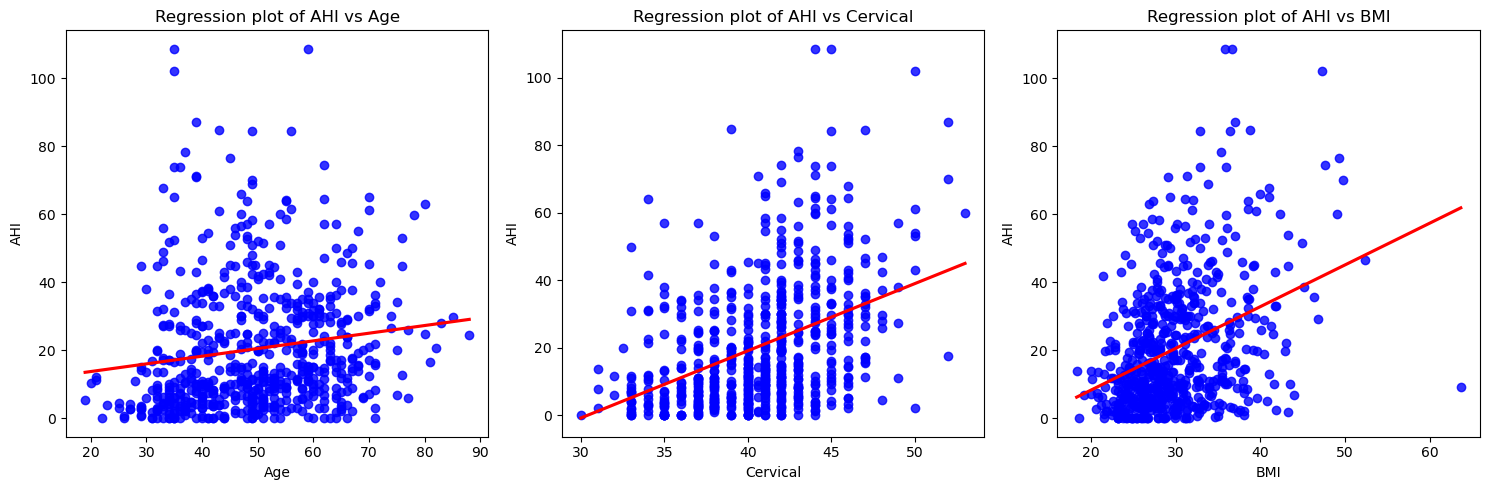

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='Age', y='AHI', data=df_reg, ax=ax[0], ci=False, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax[0].set_title('Regression plot of AHI vs Age')

sns.regplot(x='Cervical', y='AHI', data=df_reg, ax=ax[1], ci=False, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax[1].set_title('Regression plot of AHI vs Cervical')

sns.regplot(x='BMI', y='AHI', data=df_reg, ax=ax[2], ci=False, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
ax[2].set_title('Regression plot of AHI vs BMI')

plt.tight_layout()
plt.show()

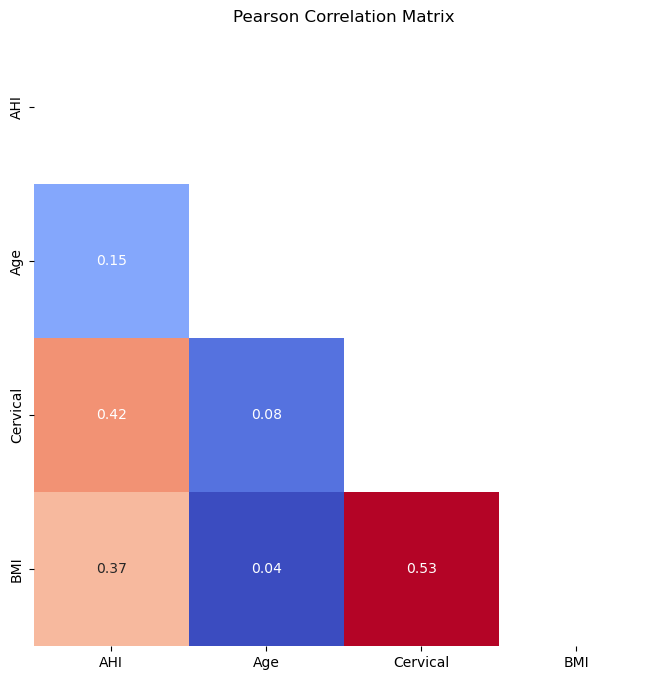

In [48]:
# Plot the Pearson correlation matrix of corr_matrix_reg
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix_reg, annot=True, fmt='.2f', mask=np.triu(corr_matrix_reg), cbar=False, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

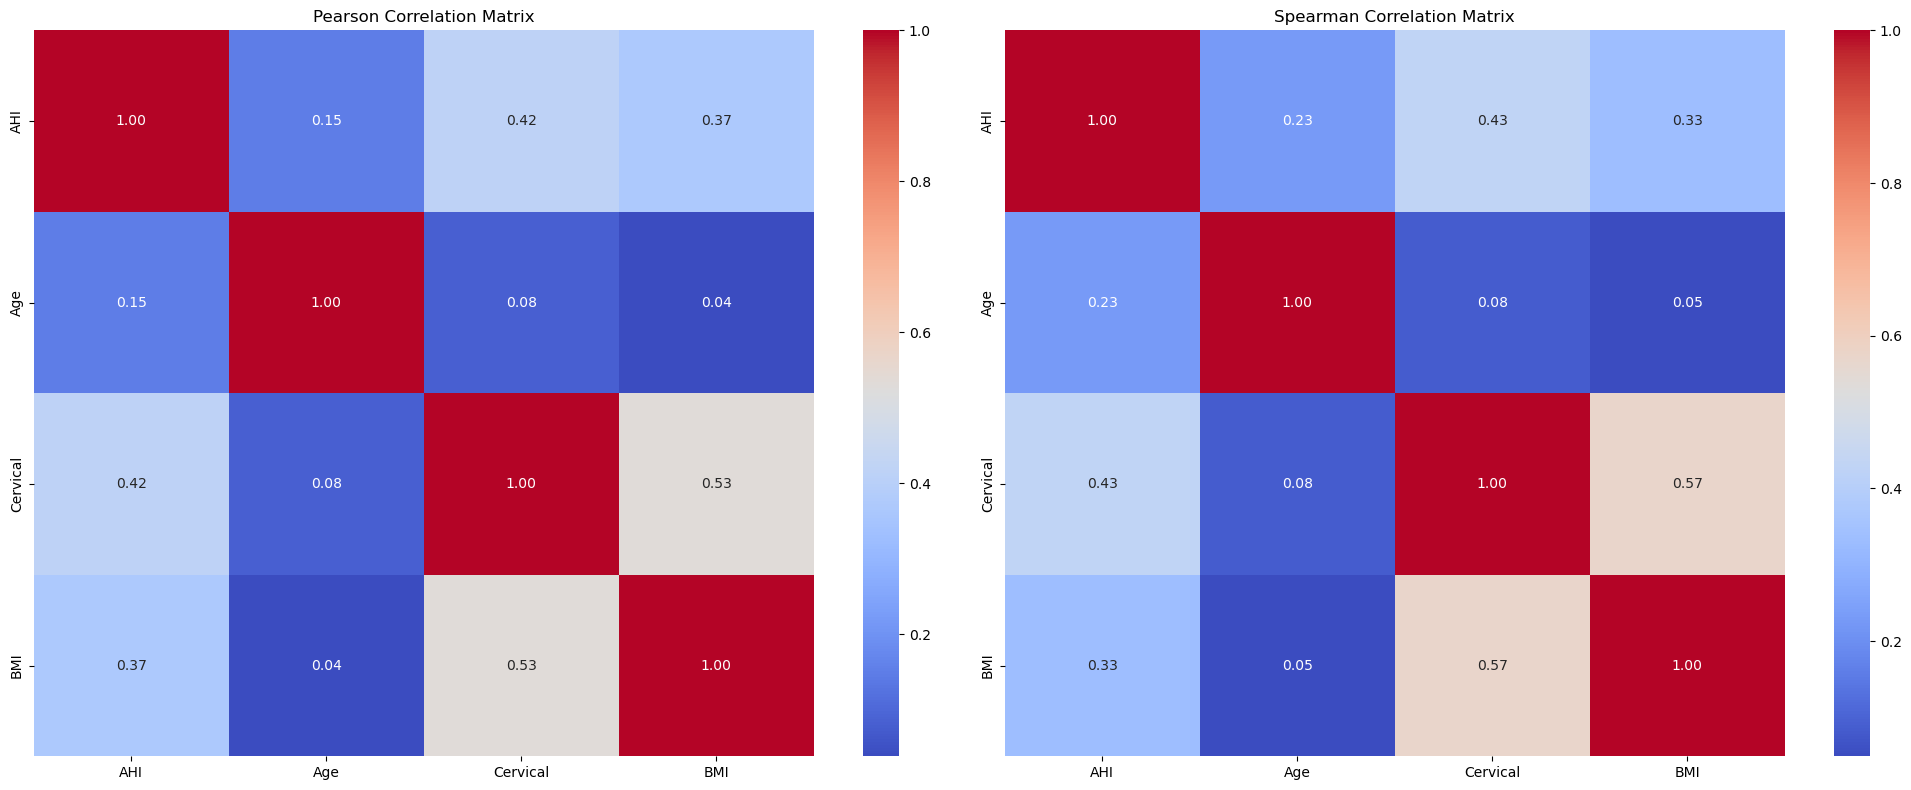

In [53]:
corr_matrix_reg = df_reg.corr()
spearman_corr_matrix = df_reg.corr(method='spearman')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the Pearson correlation matrix
sns.heatmap(corr_matrix_reg, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Pearson Correlation Matrix')

# Plot the Spearman correlation matrix
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Spearman Correlation Matrix')

plt.tight_layout()
plt.show()